<a href="https://colab.research.google.com/github/lingfang23/Clustering-project/blob/main/HM_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Processing - Customer

In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/Kaggle - H&M/Dataset/customers.csv')

In [ ]:
customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
#make sure FN is null value plus positive value equal to number of dataset
print(customer["FN"].value_counts())
print("Customers who didn't accept to receive fashion news: {}".format(customer["FN"].isnull().sum()))
print(895050+476930 == 1371980)

print(customer["Active"].value_counts())
print("Customers who unable to communicate: {}".format(customer["Active"].isnull().sum()))
print(907576+464404 == 1371980)

#change Na in FN into 0
customer['FN'] = np.where(customer['FN'].isnull() == True, 0, 1)
customer['Active'] = np.where(customer['Active'].isnull() == True, 0, 1)


1.0    476930
Name: FN, dtype: int64
Customers who didn't accept to receive fashion news: 895050
True
1.0    464404
Name: Active, dtype: int64
Customers who unable to communicate: 907576
True


In [ ]:
# Unified all the value
customer['fashion_news_frequency'] = customer['fashion_news_frequency'].replace("None", "NONE")
print(customer["fashion_news_frequency"].value_counts())

NONE         877713
Regularly    477416
Monthly         842
Name: fashion_news_frequency, dtype: int64


In [ ]:
customer["club_member_status"].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [ ]:
# there are enough value therefore I decided to drop all null value
customer = customer.dropna()
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338570 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1338570 non-null  object 
 1   FN                      1338570 non-null  int64  
 2   Active                  1338570 non-null  int64  
 3   club_member_status      1338570 non-null  object 
 4   fashion_news_frequency  1338570 non-null  object 
 5   age                     1338570 non-null  float64
 6   postal_code             1338570 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 81.7+ MB


## Artical

In [ ]:
article = pd.read_csv('/content/drive/MyDrive/Kaggle - H&M/Dataset/articles.csv')

In [ ]:
article.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [ ]:
article.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


## Transaction Processing

In [ ]:
transaction = pd.read_csv('/content/drive/MyDrive/Kaggle - H&M/Dataset/transactions_train.csv')

In [ ]:
transaction["t_dat"] = pd.to_datetime(transaction["t_dat"])
transaction["weekday"] = transaction["t_dat"].dt.dayofweek

In [ ]:
transaction['weekend'] = transaction["weekday"].apply(lambda x: 1 if x >= 4 else 0)

In [ ]:
transaction = transaction.drop(columns=["article_id", "price", "weekday","t_dat"])

In [ ]:
transaction["sales_channel_id"] = np.where(transaction["sales_channel_id"] == 2, 1, 0)

In [ ]:
new_t = pd.read_csv("/content/drive/MyDrive/Kaggle - H&M/Dataset/transaction_clean.csv")



> cus_seg processing



In [ ]:
cus_seg = pd.read_csv("/content/drive/MyDrive/Kaggle - H&M/Dataset/cus_seg.csv")
cus_seg = cus_seg.drop(columns= ["Unnamed: 0"])

In [ ]:
cus_seg["sales_channel_id"] = np.where(cus_seg["sales_channel_id"] == "2", 1, 0)
cus_seg = cus_seg.rename(columns={"sales_channel_id": "Online"})
cus_seg = cus_seg.replace({'weekend': '[0 1]'}, {'weekend': '0'})

In [ ]:
cus_seg[["max_date", "min_date"]] = cus_seg[["max_date", "min_date"]].apply(pd.to_datetime)
cus_seg['period'] = (cus_seg["max_date"] - cus_seg["min_date"]).dt.days
cus_seg["Interval"] = (cus_seg['period'] / cus_seg['Frequency']).round(2)

In [ ]:
cus_seg = cus_seg.drop(columns=["min_date", "max_date", "period"])

In [ ]:
df_c = pd.merge(cus_seg, customer, how = "inner")

In [ ]:
df_c = df_c.drop(columns="postal_code")

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/Kaggle - H&M/Dataset/clustering_data.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_c.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Clustering


In [ ]:
df_c = pd.read_csv("/content/drive/My Drive/Kaggle - H&M/Dataset/clustering_data.csv")

In [ ]:
print(df_c["club_member_status"].value_counts())
print(df_c["fashion_news_frequency"].value_counts())

ACTIVE        1245164
PRE-CREATE      83360
LEFT CLUB         463
Name: club_member_status, dtype: int64
NONE         855818
Regularly    472335
Monthly         834
Name: fashion_news_frequency, dtype: int64


In [ ]:
df_c["club_member_active"] = np.where(df_c["club_member_status"] == "ACTIVE", 1, 0)
df_c["club_member_pre"] = np.where(df_c["club_member_status"] == "PRE-CREATE", 1, 0)
df_c["fashion_news_regular"] = np.where(df_c["fashion_news_frequency"] == "Regularly", 1, 0)
df_c["fashion_news_month"] = np.where(df_c["fashion_news_frequency"] == "Monthly", 1, 0)

In [ ]:
df_c = df_c.drop(columns=["customer_id", "Unnamed: 0", "club_member_status", "fashion_news_frequency"])

In [ ]:
df_c

,price_x,Frequency,Online,weekend,Interval,FN,Active,age,club_member_active,club_member_pre,fashion_news_regular,fashion_news_month
0,0.648983,21,1,1,29.43,0,0,49.0,1,0,0,0
1,2.601932,86,1,0,7.63,0,0,25.0,1,0,0,0
2,0.704780,18,1,0,40.33,0,0,24.0,1,0,0,0
3,0.060983,2,1,1,0.00,0,0,54.0,1,0,0,0
4,0.469695,13,1,0,51.54,1,1,52.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1328982,1.292356,51,1,0,10.24,0,0,24.0,1,0,0,0
1328983,1.807322,84,1,0,8.25,0,0,21.0,1,0,0,0
1328984,0.788932,45,1,0,16.00,1,1,21.0,1,0,1,0
1328985,0.209203,7,1,1,11.14,1,1,18.0,1,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_c)

from sklearn.cluster import KMeans

In [ ]:
# Specify the MAXIMIUM K value that we are considering
n_k_values = 10

# Specify the random state you will be using in the algorithm
random_state = 0

# Create a dictionary in which we will store the estimated K-means objects
kmeans_objects = {}

# Create a pandas Series in which we store the SSE values for each K-means object
kmeans_sse = pd.Series(
    data=np.zeros(n_k_values),
    index=np.arange(n_k_values) + 1
)

# Loop over the values k = 1, 2, ..., n_k_values
for k in range(1, n_k_values + 1):
    
    # do not forget to fix your random state!
    kmeans = KMeans(n_clusters=k, random_state=random_state).fit(scaled_df)

    # save the kmeans object in the dictionary at key k
    kmeans_objects[k] = kmeans

    # save the kmeans SSE value at location k
    kmeans_sse.loc[k] = kmeans.inertia_
    
    print('Done with: k =', k)

Done with: k = 1
Done with: k = 2
Done with: k = 3
Done with: k = 4
Done with: k = 5
Done with: k = 6
Done with: k = 7
Done with: k = 8
Done with: k = 9
Done with: k = 10


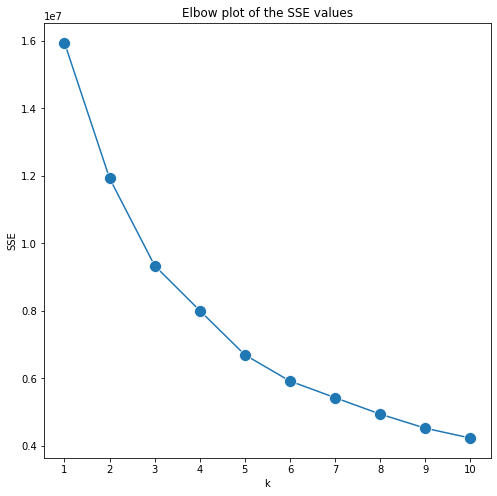

In [ ]:
plt.figure(figsize=(8, 8))

plt.title('Elbow plot of the SSE values')
plt.ylabel('SSE')
plt.xlabel('k')

sns.lineplot(
    x=range(1, n_k_values + 1),
    y=kmeans_sse,
    marker='o',
    markersize=12,
)

plt.xticks(range(1, n_k_values + 1))
plt.show()

In [ ]:
seg1 = KMeans(n_clusters=3)
#Fitting the input data
seg1.fit(scaled_df)
#predicting the labels of the input data
y = seg1.predict(scaled_df)

In [ ]:
df_c["label"] = y

In [ ]:
df_c.head()

,Unnamed: 0,customer_id,price_x,Frequency,Online,weekend,Interval,FN,Active,club_member_status,fashion_news_frequency,age,label
0,0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983,21,1,1,29.43,0,0,ACTIVE,NONE,49.0,1
1,1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932,86,1,0,7.63,0,0,ACTIVE,NONE,25.0,1
2,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,18,1,0,40.33,0,0,ACTIVE,NONE,24.0,1
3,3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983,2,1,1,0.00,0,0,ACTIVE,NONE,54.0,1
4,4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,13,1,0,51.54,1,1,ACTIVE,Regularly,52.0,0


In [ ]:
df_c["label"].value_counts()

1    779468
0    465913
2     83606
Name: label, dtype: int64

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/Kaggle - H&M/Dataset/clustering_result.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_c.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Clustering Analysis

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Kaggle - H&M/Dataset/clustering_result.csv")

In [ ]:
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])

In [ ]:
df["label"].value_counts()

1    779468
0    465913
2     83606
Name: label, dtype: int64

In [ ]:
label0 = df[df["label"] == 0]
label1 = df[df["label"] == 1]
label2 = df[df["label"] == 2]

In [ ]:
prop_2 = label2["label"][(label2["Interval"] == 0) & (label2["Frequency"] <= 10)].count()/label2["label"].count()
prop_0 = label0["label"][(label0["Interval"] == 0) & (label0["Frequency"] <= 10)].count()/label0["label"].count()
prop_1 = label1["label"][(label1["Interval"] == 0) & (label1["Frequency"] <= 10)].count()/label1["label"].count()

print("Group 1 customers who only bought once: {}".format(prop_0.round(2)))
print("Group 2 customers who only bought once: {}".format(prop_1.round(2)))
print("Group 3 customers who only bought once: {}".format(prop_2.round(2)))

Group 1 customers who only bought once: 0.24
Group 2 customers who only bought once: 0.33
Group 3 customers who only bought once: 0.58


In [ ]:
# get rid of people who only bought one 
mean_in2 = label2["Interval"][label2["Interval"] != 0].mean()
mean_in1 = label1["Interval"][label1["Interval"] != 0].mean()
mean_in0 = label0["Interval"][label0["Interval"] != 0].mean()

print("Group {} Interval without one time customers: {}".format(round(mean_in0,2)))
print("Interval without one time customers: {}".format(round(mean_in1,2)))
print("Interval without one time customers: {}".format(round(mean_in2,2)))

Interval without one time customers: 24.33
Interval without one time customers: 23.54
Interval without one time customers: 31.33
